<a href="https://colab.research.google.com/github/Miftahul-adib/Image-classification/blob/main/TRANSFER_LERANING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TRANSFER LEARNING

transfer learning means taking a model trained on one task (like recognizing animals) and using it for another related task (like recognizing different types of pets), instead of starting from scratch.









# Transfer Learning with VGG16 for Cat vs. Dog Classification

1. Data Acquisition and Setup:

I downloaded the "Dogs vs. Cats" dataset from Kaggle using the Kaggle API.
I extracted the dataset into my Colab environment.
I created training and test datasets using image_dataset_from_directory with appropriate labels and image sizes.
I preprocessed the images by scaling pixel values to the range [0, 1].
2. Model Construction:

I loaded the VGG16 model with include_top=False to use it as a feature extractor, utilizing its pre-trained weights from ImageNet.
I froze the convolutional layers of VGG16 to prevent their weights from being updated during initial training.
I added custom layers on top of the VGG16 base, including a flattening layer, a dense layer with ReLU activation, and a final dense layer with sigmoid activation for binary classification.
3. Fine-tuning:

I selectively unfroze some of the later convolutional layers of VGG16 (starting from block5_conv1) to allow them to be fine-tuned during training.
This approach helps the model adapt to the specific characteristics of the cat vs. dog dataset while retaining the general knowledge gained from ImageNet.
4. Training and Evaluation:

I compiled the model with the RMSprop optimizer, binary cross-entropy loss function, and accuracy metric.
I trained the model on the training dataset for a specified number of epochs, using the test dataset for validation.
I plotted the training and validation accuracy and loss curves to visualize the model's performance over time.
5. Data Augmentation (Optional):

I explored using ImageDataGenerator for data augmentation.
This augmentation included random transformations like rescaling, shearing, zooming, and horizontal flipping to the training data.
I retrained the model with the augmented data to potentially improve its generalization capabilities.


In [ ]:
!mkdir -p ~/.kaggle
!cp "/content/kaggle.json" ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown


In [ ]:
import zipfile

In [ ]:
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip')

In [ ]:
zip_ref.extractall('/content/')

In [ ]:
zip_ref.close()

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten


In [ ]:
from keras.applications.vgg16 import VGG16

In [ ]:
conv_base=VGG16( weights='imagenet',include_top=False,input_shape=(150,150,3))

In [ ]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
conv_base.layers

[<InputLayer name=input_layer_2, built=True>,
 <Conv2D name=block1_conv1, built=True>,
 <Conv2D name=block1_conv2, built=True>,
 <MaxPooling2D name=block1_pool, built=True>,
 <Conv2D name=block2_conv1, built=True>,
 <Conv2D name=block2_conv2, built=True>,
 <MaxPooling2D name=block2_pool, built=True>,
 <Conv2D name=block3_conv1, built=True>,
 <Conv2D name=block3_conv2, built=True>,
 <Conv2D name=block3_conv3, built=True>,
 <MaxPooling2D name=block3_pool, built=True>,
 <Conv2D name=block4_conv1, built=True>,
 <Conv2D name=block4_conv2, built=True>,
 <Conv2D name=block4_conv3, built=True>,
 <MaxPooling2D name=block4_pool, built=True>,
 <Conv2D name=block5_conv1, built=True>,
 <Conv2D name=block5_conv2, built=True>,
 <Conv2D name=block5_conv3, built=True>,
 <MaxPooling2D name=block5_pool, built=True>]

In [ ]:
conv_base.trainable

True

In [ ]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in conv_base.layers:
  print(layer.name,layer.trainable)

input_layer_2 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [ ]:
conv_base.trainable=True

set_trainable=False

for layer in conv_base.layers:
  if layer.name =='block5_conv1':
    set_trainable=True
  if set_trainable:
    layer.trainable=True
  else:
    layer.trainable=False

for layer in conv_base.layers:
  print(layer.name,layer.trainable)

input_layer_2 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [ ]:
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=64,
    image_size=(150,150)
)


test_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=64,
    image_size=(150,150)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
def process(image,label):
  image=tensorflow.cast(image/255.0, tensorflow.float32)
  return image,label

train_ds=train_ds.map(process)
test_ds=test_ds.map(process)

In [ ]:
model=Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_ds,epochs=10,validation_data=test_ds)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 110s 301ms/step - accuracy: 0.8344 - loss: 0.3556 - val_accuracy: 0.9276 - val_loss: 0.1762
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 87s 277ms/step - accuracy: 0.9356 - loss: 0.1621 - val_accuracy: 0.9236 - val_loss: 0.1777
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 136s 258ms/step - accuracy: 0.9517 - loss: 0.1219 - val_accuracy: 0.9434 - val_loss: 0.1338
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 88s 277ms/step - accuracy: 0.9648 - loss: 0.0929 - val_accuracy: 0.9402 - val_loss: 0.1475
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 142s 278ms/step - accuracy: 0.9727 - loss: 0.0764 - val_accuracy: 0.8946 - val_loss: 0.2802
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 136s 259ms/step - accuracy: 0.9795 - loss: 0.0597 - val_accuracy: 0.9476 - val_loss: 0.1264
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 81s 257ms/step - accuracy: 0.9861 - loss: 0.0444 - val_accuracy: 0.9516 - val_loss: 0.1216
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 81s 257ms/step - accuracy: 0.9904 - los

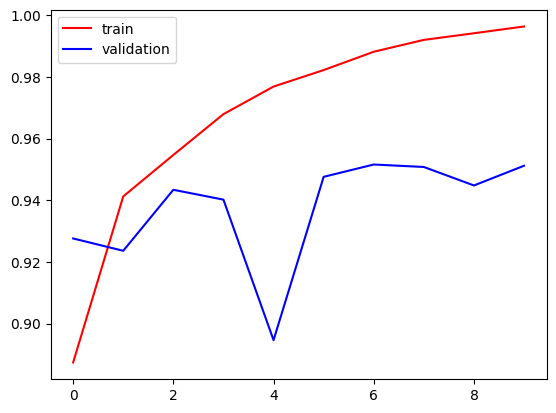

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

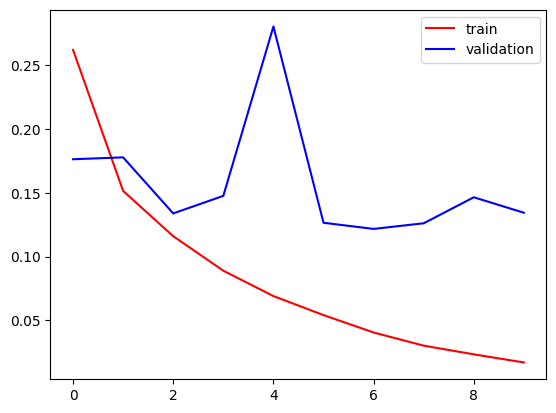

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
model1= Sequential()

model1.add(conv_base)
model1.add(Flatten())
model1.add(Dense(256,activation='relu'))
model1.add(Dense(1,activation='sigmoid'))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img


In [ ]:
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/train',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/test',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:
model1.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history1 = model1.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 163s 256ms/step - accuracy: 0.9103 - loss: 0.2089 - val_accuracy: 0.9498 - val_loss: 0.1196
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 157s 251ms/step - accuracy: 0.9542 - loss: 0.1080 - val_accuracy: 0.9516 - val_loss: 0.1222
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 157s 251ms/step - accuracy: 0.9653 - loss: 0.0907 - val_accuracy: 0.9476 - val_loss: 0.1466
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 158s 253ms/step - accuracy: 0.9686 - loss: 0.0821 - val_accuracy: 0.9514 - val_loss: 0.1217
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 160s 256ms/step - accuracy: 0.9735 - loss: 0.0700 - val_accuracy: 0.9572 - val_loss: 0.1146
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 161s 258ms/step - accuracy: 0.9751 - loss: 0.0633 - val_accuracy: 0.9558 - val_loss: 0.1228
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 160s 256ms/step - accuracy: 0.9799 - loss: 0.0570 - val_accuracy: 0.9510 - val_loss: 0.1395
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 163s 260ms/step - accuracy: 0.9817 -

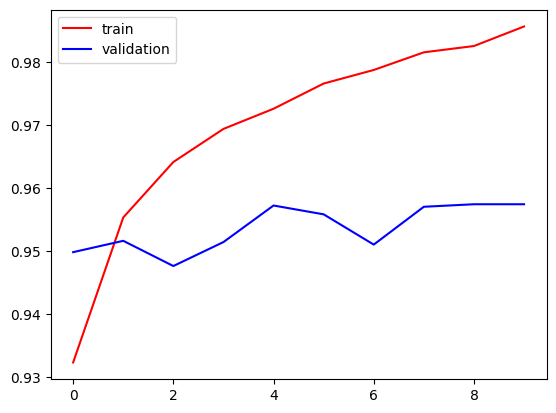

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history1.history['accuracy'],color='red',label='train')
plt.plot(history1.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

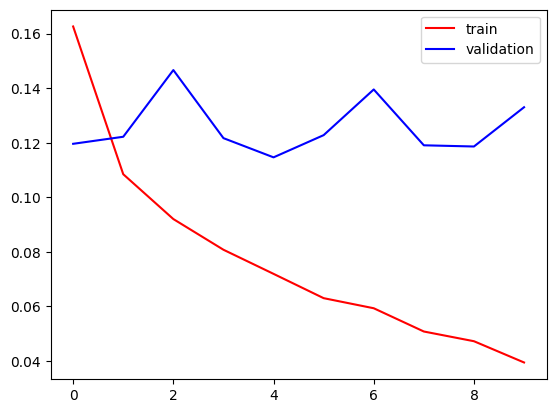

In [ ]:
plt.plot(history1.history['loss'],color='red',label='train')
plt.plot(history1.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()